* **Setup**

In [1]:
import sys, os
current_directory = os.getcwd()
root_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
sys.path.append(root_directory)

* **Import utils**

In [2]:
from pretrained.predictor import SingleKModel, MultiKModel, OneTestKModel, BatchSingleKModel
import metrics

* **Predict**

1- Using single K Model

In [3]:
kmodel = BatchSingleKModel(kmer_size=5, batch_size=2000)
kmodel.set_load_config("../data/testset-full/k5/testset.csv", format="csv", type='kmer_file')
genboard = kmodel.predict()

Batch Predictions: 33it [28:03, 51.01s/it] 


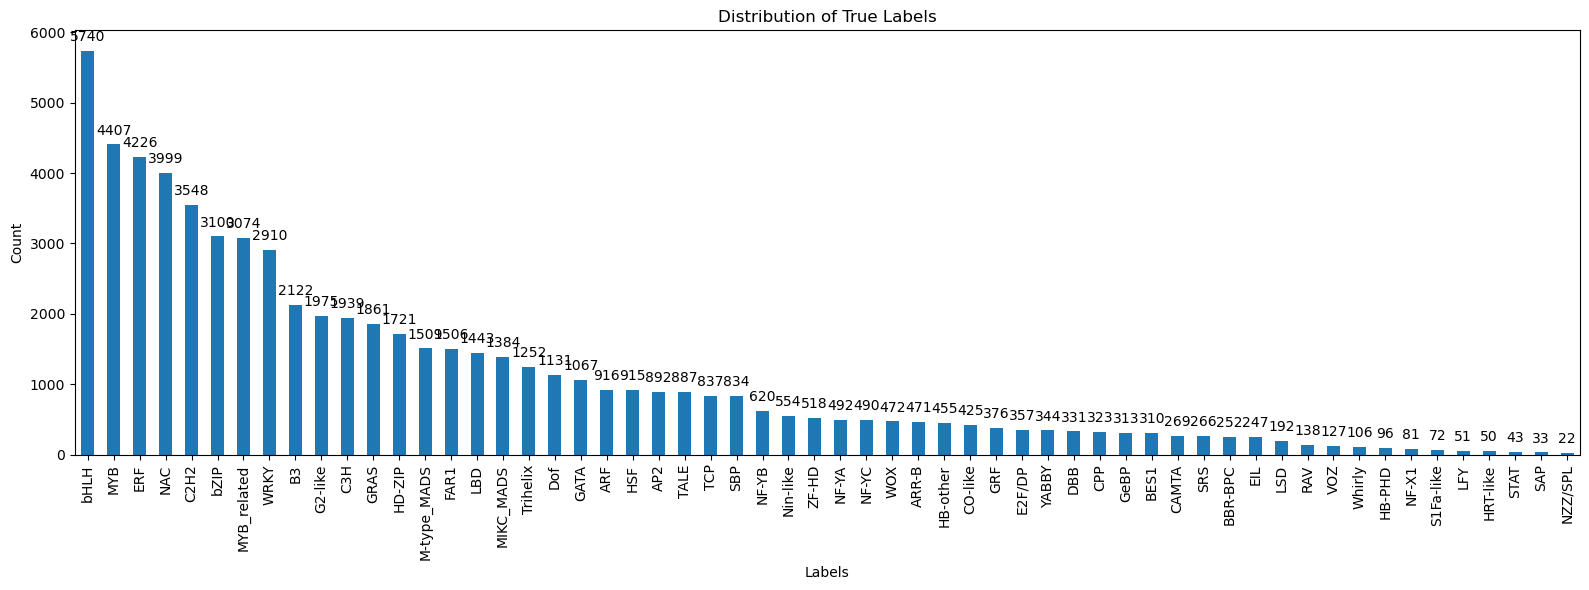

In [4]:
metrics.plot_testset(true_label_df_path="../data/testset-full/k5/true_labels.csv", class_mapping_df_path="../data/testset-full/k5/class_mapping.json")

In [ ]:
genboard.display()

<!--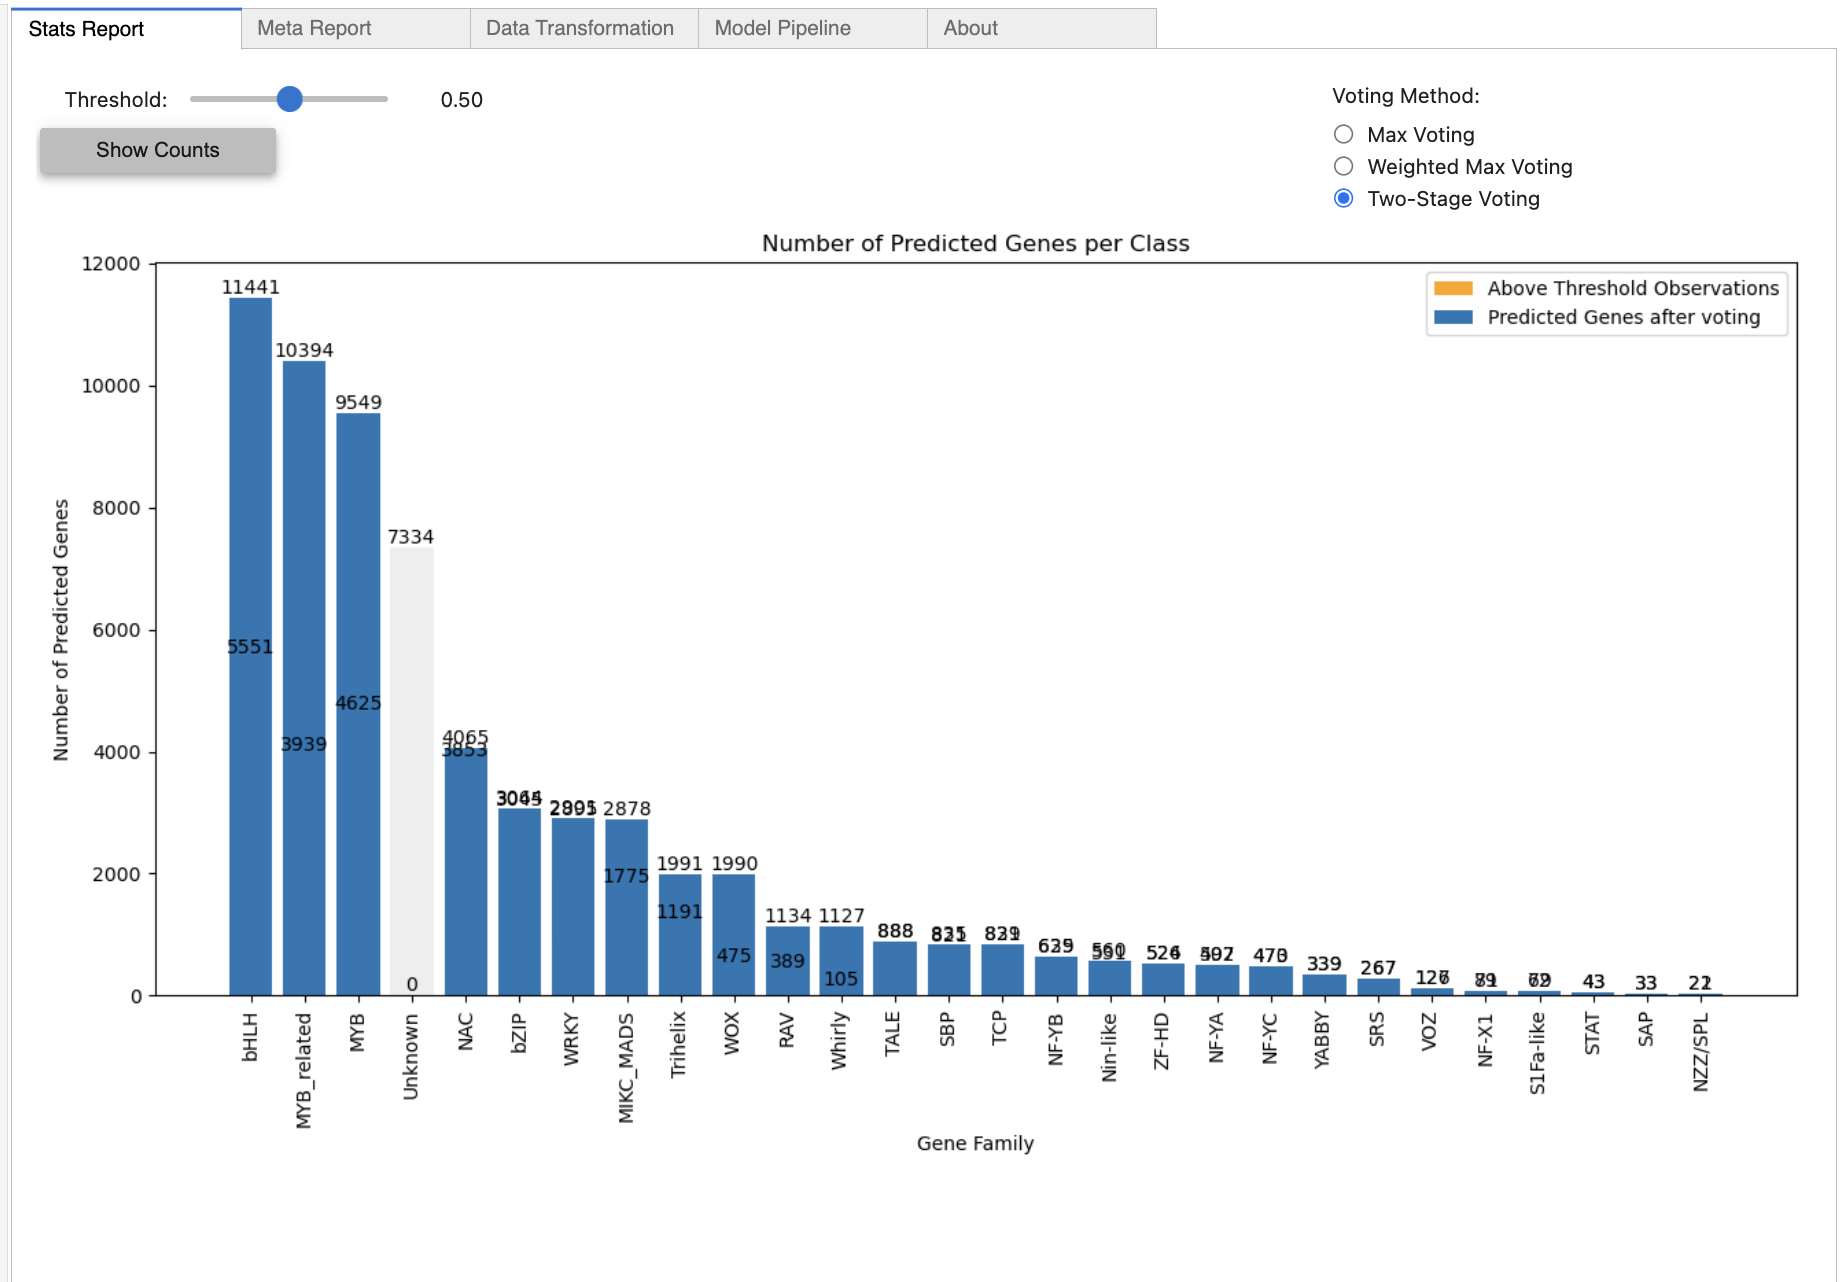

In [5]:
genboard.prediction.shape

(64091, 58)

* **Confusion report for validation**

In [6]:
import json
import pandas as pd

true_label = pd.read_csv('../data/testset-full/k5/true_labels.csv')['true_label'].values
with open('../data/testset-full/k5/class_mapping.json', 'r') as json_file:
    class_mapping = json.load(json_file)
class_mapping['Unknown'] = 0


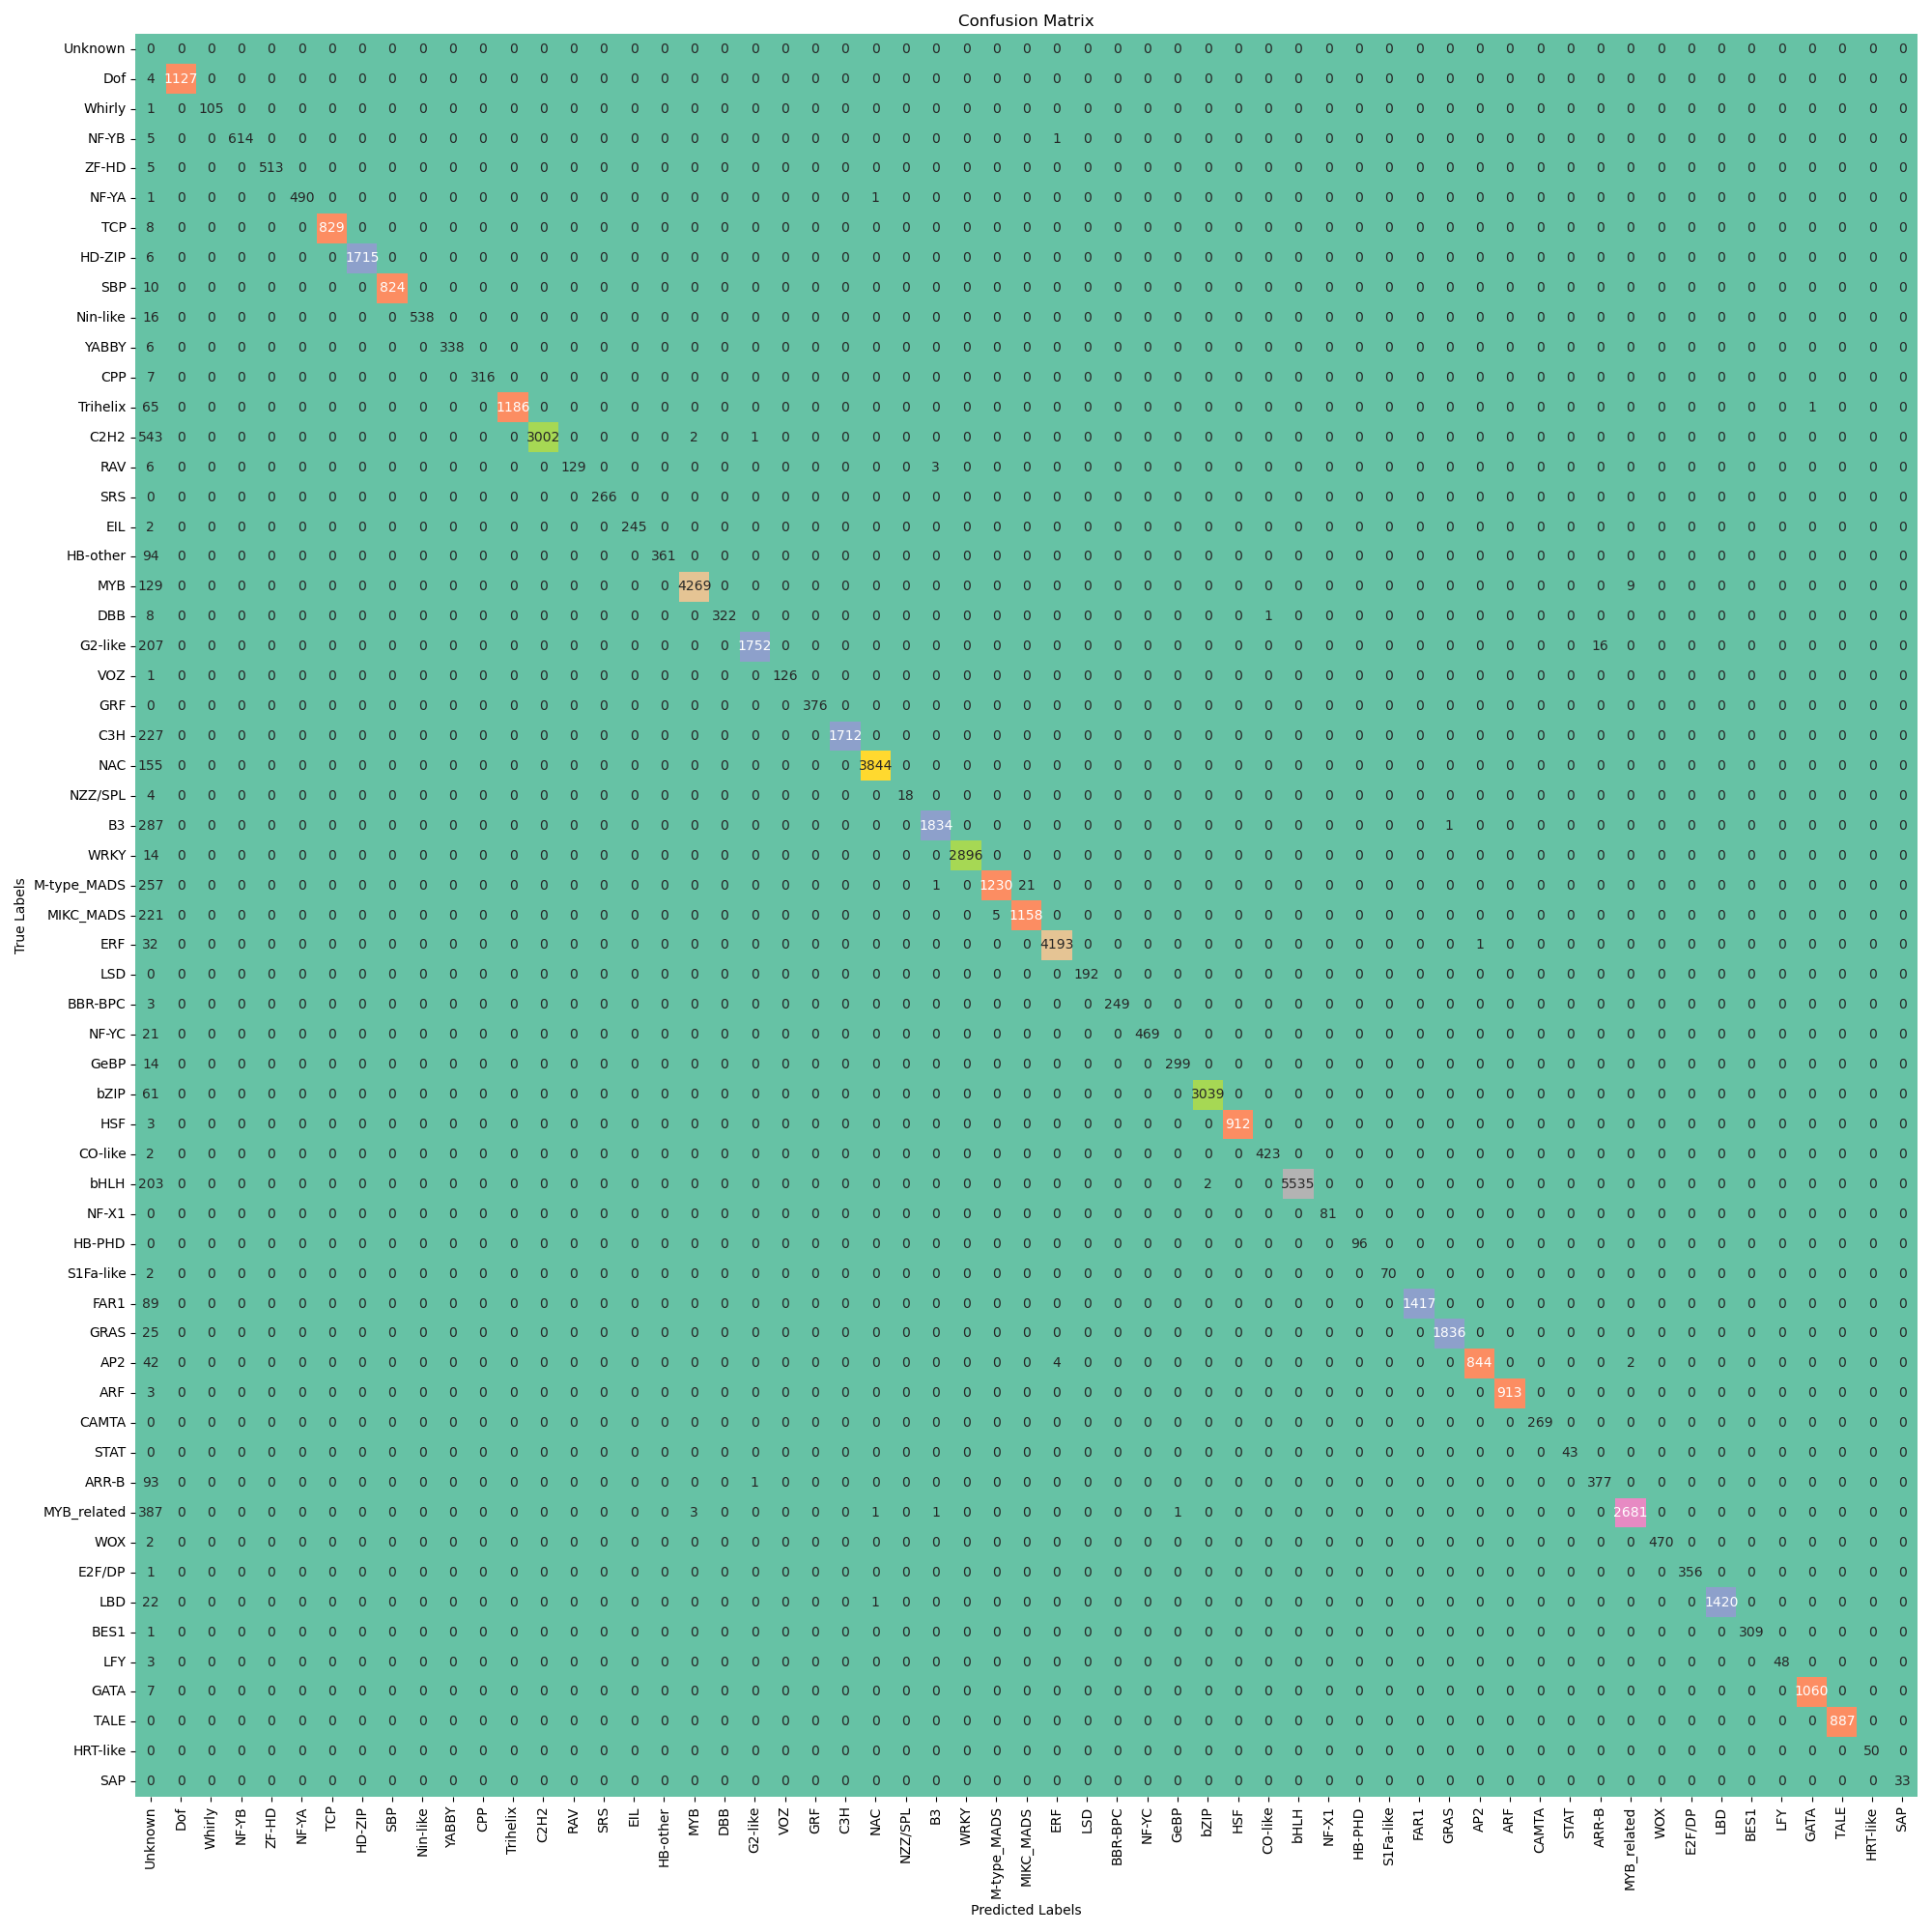
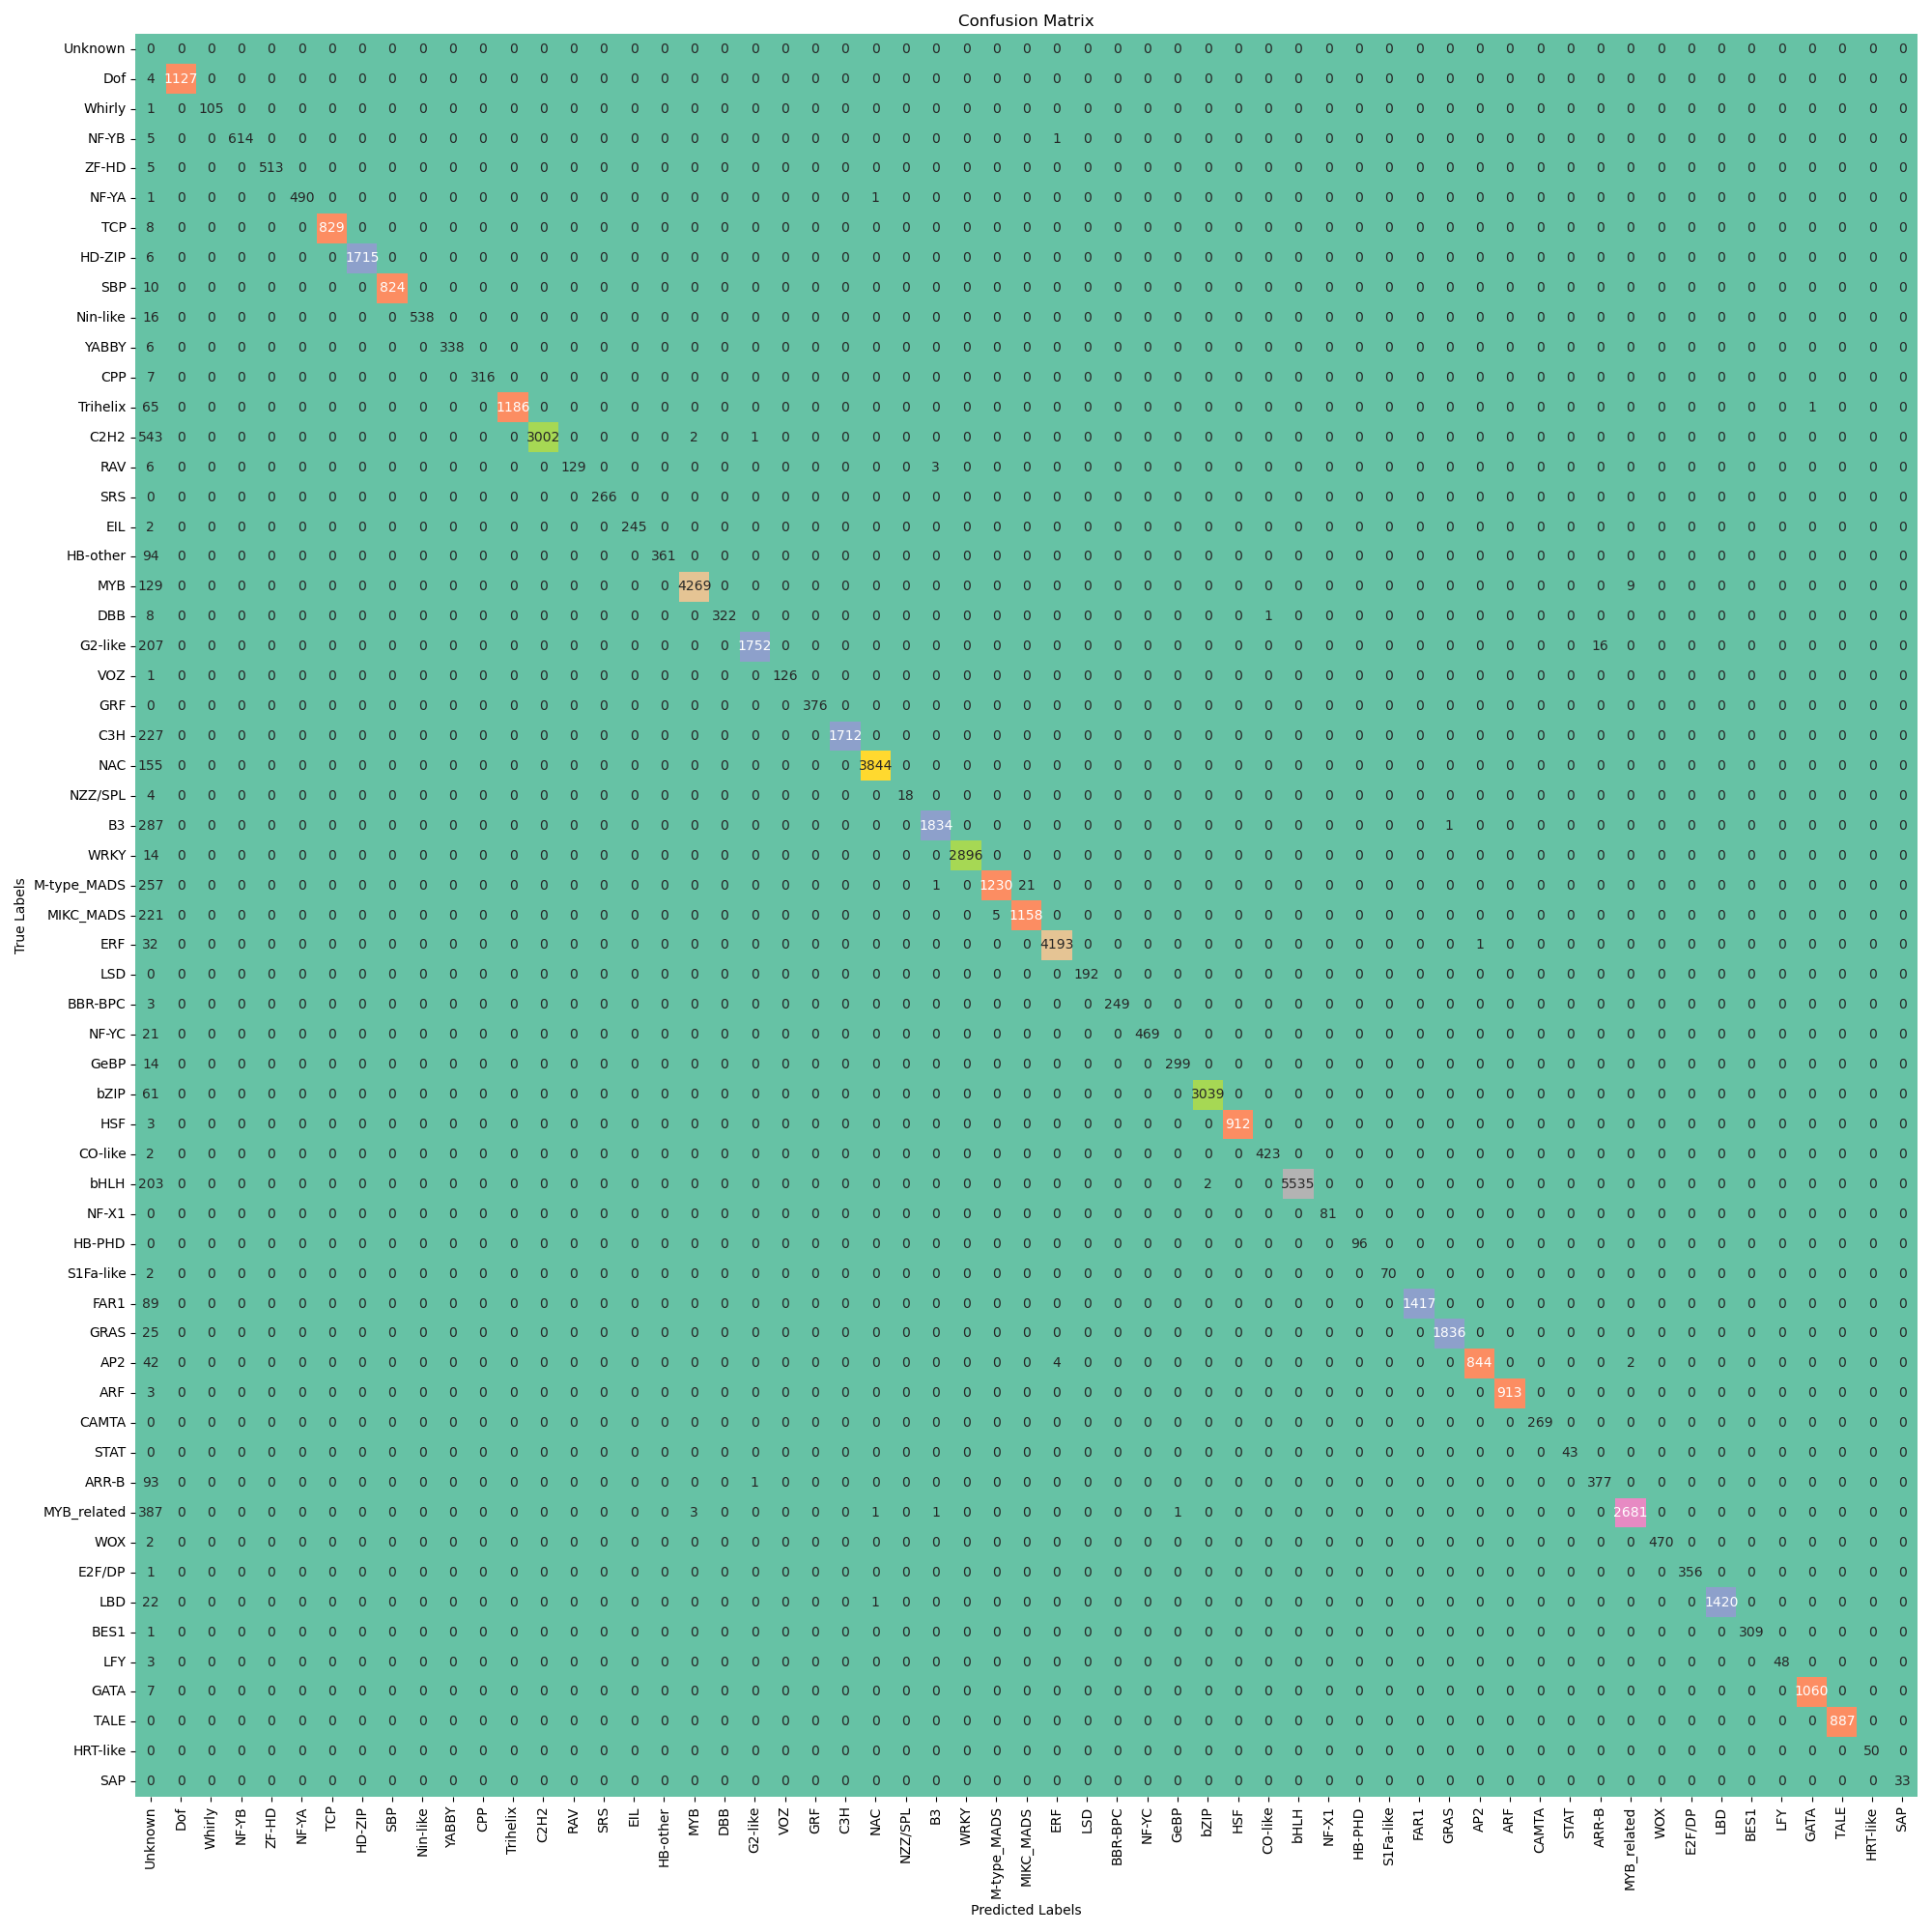

In [12]:
genboard.show_eval_metric(
    true_label=true_label,
    class_mapping_rules=class_mapping,
    voting_method="Two-Stage Voting",
    voting_threshold=0.95,
    binary_class_threshold=0.5,
    components=['confusion_matrix', 'general_accuracy', 'accuracy_per_family'],
    metrics_storage_path="./metrics"
)